In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\SHREYA NARAYAN\\Downloads\\orders_grouped_cleaned(1).csv")
df.head(10)

ORDER_ID  CUSTOMER_ID CUSTOMER_TYPE  STORE_NUMBER ORDER_CREATED_DATE  \
0     19042    948014694    Registered          2156         19-12-2024   
1     21421    681204572    Registered          1913         15-03-2025   
2     49314    705735618    Registered          4750         08-04-2024   
3     58820    914568760         Guest          1161         31-12-2024   
4     62930    304069593    Registered          4541         04-05-2024   
5     81885    481538959    Registered          1765         19-08-2024   
6     82421    190045427    Registered          1731         30-05-2024   
7     83667    100954781    Registered          3302         05-12-2024   
8     95518    568414894    Registered           400         25-03-2025   
9    103281    459458135    Registered          1161         31-01-2024   

    DAY_NAME DAY_TYPE ORDER_CHANNEL_NAME ORDER_OCCASION_NAME  num  \
0   Thursday  Weekday            Digital                ToGo    1   
1   Saturday  Weekend            Digital                ToGo    3   
2     Monday  Weekday            Digital                ToGo    1   
3    Tuesday  Weekday            Digital                ToGo    1   
4   Saturday  Weekend            Digital                ToGo    3   
5     Monday  Weekday            Digital                ToGo    1   
6   Thursday  Weekday            Digital                ToGo    3   
7   Thursday  Weekday            Digital                ToGo    2   
8    Tuesday  Weekday            Digital                ToGo    1   
9  Wednesday  Weekday            Digital                ToGo    2   

  ORDER_SUBCHANNEL_NAME       CITY    STATE POSTAL_CODE  \
0                 Kiosk  GRAPEVINE       TX       76051   
1               Website     IRVING       TX       75063   
2                 Kiosk    Unknown  Unknown     Unknown   
3                 Kiosk    Unknown  Unknown  78723-2429   
4               Website     MACOMB       MI       48044   
5                 Kiosk    Unknown  Unknown       96789   
6               Website     LAVEEN  Unknown     Unknown   
7                   App    HOUSTON       TX       77047   
8                 Kiosk    EL PASO       TX       79905   
9                   App    Unknown  Unknown  78723-2429   

                                           item_name  total_order_amount  \
0                      ['10 pc Grilled Wings Combo']               15.49   
1                       ['6 pc Grilled Wings Combo']               11.69   
2       ['10 pc Spicy Wings', 'Ranch Dip - Regular']                8.59   
3                     ['24 pc Family Grilled Wings']               37.99   
4  ['Chicken Sub', '3 pc Crispy Strips Combo', 'C...               24.97   
5  ['6 pc Spicy Wings Combo', '6 pc Grilled Wings...               24.78   
6  ['20pc Spicy Feast Deal', 'Regular Buffalo Fri...               20.28   
7  ['Fried Corn - Large', '40 pc Family Mixed Win...               66.98   
8  ['2 pc Crispy Strips', '3 pc Crispy Strips Com...               47.96   
9  ['8 pc Grilled Wings Combo', '10 pc Grilled Wi...               30.38   

   total_items  
0            1  
1            1  
2            2  
3            1  
4            3  
5            2  
6            2  
7            2  
8            2  
9            2

In [9]:
import ast
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Fix: Only apply literal_eval on strings
df['item_name'] = df['item_name'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [12]:
# --- BASIC OVERVIEW ---
print(df.info())
print(df.describe())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ORDER_ID               1048575 non-null  int64  
 1   CUSTOMER_ID            1048575 non-null  int64  
 2   CUSTOMER_TYPE          1048575 non-null  object 
 3   STORE_NUMBER           1048575 non-null  int64  
 4   ORDER_CREATED_DATE     1048575 non-null  object 
 5   DAY_NAME               1048575 non-null  object 
 6   DAY_TYPE               1048575 non-null  object 
 7   ORDER_CHANNEL_NAME     1048575 non-null  object 
 8   ORDER_OCCASION_NAME    1048575 non-null  object 
 9   num                    1048575 non-null  int64  
 10  ORDER_SUBCHANNEL_NAME  1048575 non-null  object 
 11  CITY                   1048575 non-null  object 
 12  STATE                  1048575 non-null  object 
 13  POSTAL_CODE            1048575 non-null  object 
 14  item_name         

In [13]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Data:\n", df.head())


Missing Values:
 ORDER_ID                 0
CUSTOMER_ID              0
CUSTOMER_TYPE            0
STORE_NUMBER             0
ORDER_CREATED_DATE       0
DAY_NAME                 0
DAY_TYPE                 0
ORDER_CHANNEL_NAME       0
ORDER_OCCASION_NAME      0
num                      0
ORDER_SUBCHANNEL_NAME    0
CITY                     0
STATE                    0
POSTAL_CODE              0
item_name                0
total_order_amount       0
total_items              0
dtype: int64

Sample Data:
    ORDER_ID  CUSTOMER_ID CUSTOMER_TYPE  STORE_NUMBER ORDER_CREATED_DATE  \
0     19042    948014694    Registered          2156         19-12-2024   
1     21421    681204572    Registered          1913         15-03-2025   
2     49314    705735618    Registered          4750         08-04-2024   
3     58820    914568760         Guest          1161         31-12-2024   
4     62930    304069593    Registered          4541         04-05-2024   

   DAY_NAME DAY_TYPE ORDER_CHANNEL_NAME ORDE

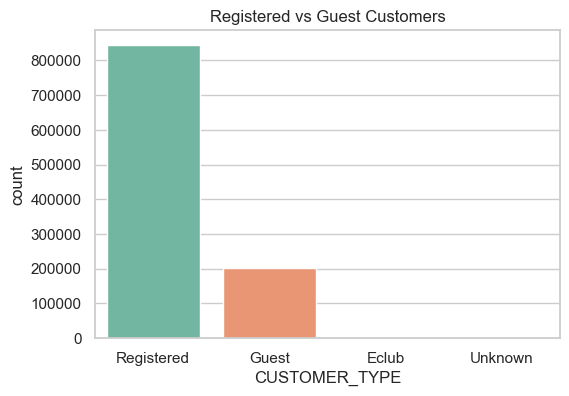

In [15]:
# --- CUSTOMER TYPE DISTRIBUTION ---
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='CUSTOMER_TYPE', palette='Set2')
plt.title("Registered vs Guest Customers")
plt.show()

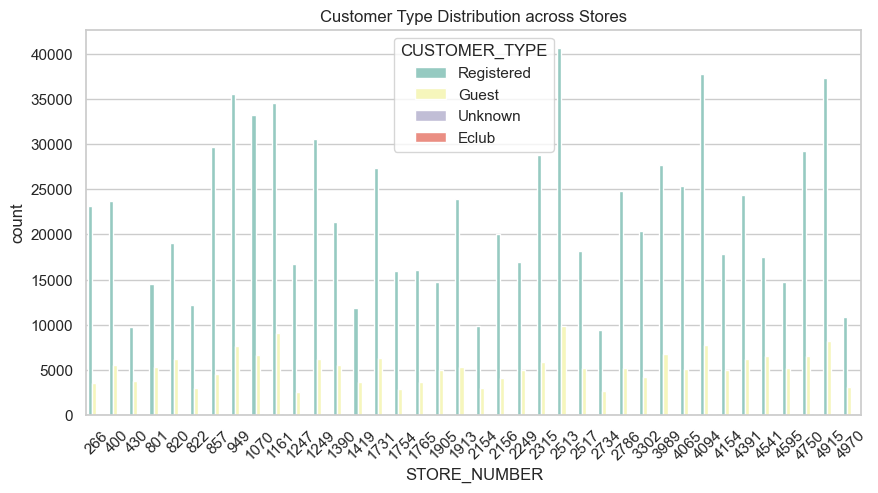

In [17]:
# --- STORE-WISE CUSTOMER TYPE DISTRIBUTION ---
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='STORE_NUMBER', hue='CUSTOMER_TYPE', palette='Set3')
plt.title("Customer Type Distribution across Stores")
plt.xticks(rotation=45)
plt.show()

In [24]:
df[df['CUSTOMER_TYPE'] == 'Eclub'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1406 entries, 42 to 1048255
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ORDER_ID               1406 non-null   int64  
 1   CUSTOMER_ID            1406 non-null   int64  
 2   CUSTOMER_TYPE          1406 non-null   object 
 3   STORE_NUMBER           1406 non-null   int64  
 4   ORDER_CREATED_DATE     1406 non-null   object 
 5   DAY_NAME               1406 non-null   object 
 6   DAY_TYPE               1406 non-null   object 
 7   ORDER_CHANNEL_NAME     1406 non-null   object 
 8   ORDER_OCCASION_NAME    1406 non-null   object 
 9   num                    1406 non-null   int64  
 10  ORDER_SUBCHANNEL_NAME  1406 non-null   object 
 11  CITY                   1406 non-null   object 
 12  STATE                  1406 non-null   object 
 13  POSTAL_CODE            1406 non-null   object 
 14  item_name              1406 non-null   object 
 15  total

In [25]:
df['CUSTOMER_TYPE'].value_counts(normalize=True).mul(100).round(2)

CUSTOMER_TYPE
Registered    80.60
Guest         19.20
Eclub          0.13
Unknown        0.06
Name: proportion, dtype: float64

In [26]:
# Consolidate CUSTOMER_TYPE to clean up noise
df['CUSTOMER_TYPE'] = df['CUSTOMER_TYPE'].replace({'Eclub': 'Registered', 'Unknown': 'Guest'})

In [28]:
df['CUSTOMER_TYPE'].value_counts(normalize=True).mul(100).round(2)

CUSTOMER_TYPE
Registered    80.74
Guest         19.26
Name: proportion, dtype: float64

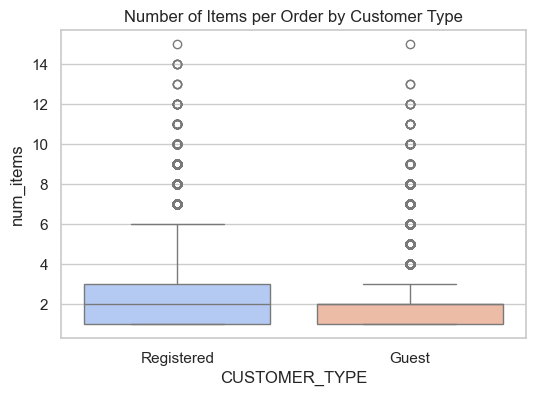

In [29]:
# --- AVERAGE ITEM COUNT PER CART BY CUSTOMER TYPE ---
df['num_items'] = df['item_name'].apply(len)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='CUSTOMER_TYPE', y='num_items', palette='coolwarm')
plt.title("Number of Items per Order by Customer Type")
plt.show()

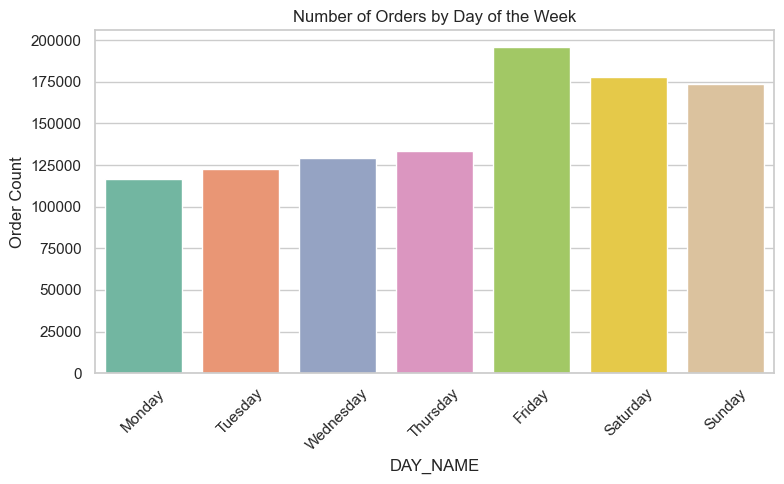

In [31]:
# Plot order count by DAY_NAME
plt.figure(figsize=(8, 5))
order_by_day = df['DAY_NAME'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='Set2')
plt.title("Number of Orders by Day of the Week")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

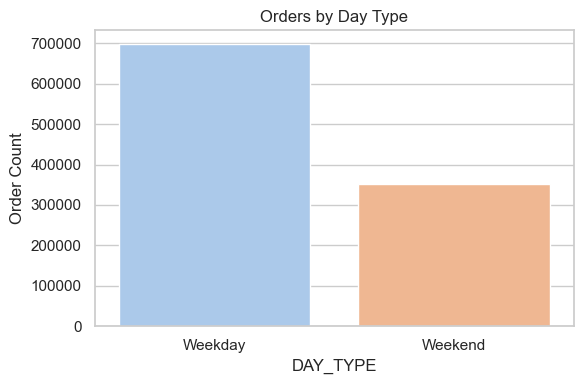

In [32]:
# Plot order count by DAY_TYPE (e.g., Weekend vs Weekday)
if 'DAY_TYPE' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='DAY_TYPE', palette='pastel')
    plt.title("Orders by Day Type")
    plt.ylabel("Order Count")
    plt.tight_layout()
    plt.show()

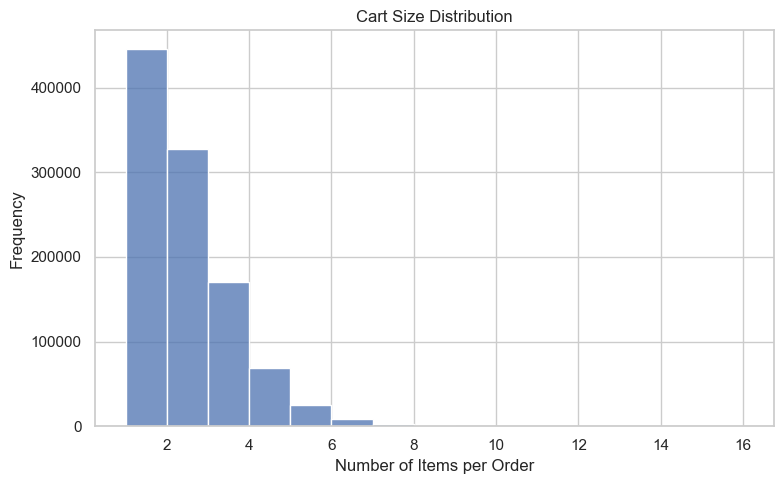

In [33]:
# Add a cart size column
df['cart_size'] = df['item_name'].apply(len)

# Distribution of cart sizes
plt.figure(figsize=(8, 5))
sns.histplot(df['cart_size'], bins=range(1, df['cart_size'].max() + 2), kde=False)
plt.title('Cart Size Distribution')
plt.xlabel('Number of Items per Order')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [36]:
# Top 10 most frequent cart combos
from collections import Counter
from itertools import combinations
df['cart_tuple'] = df['item_name'].apply(lambda x: tuple(sorted(x)))
top_combos = df['cart_tuple'].value_counts().head(10)

print("\n Top 10 Most Frequent Item Combos:")
for combo, count in top_combos.items():
    print(f"{combo} — {count} orders")

# Optional: Heatmap of item co-occurrence
pair_counter = Counter()
for items in df['item_name']:
    for pair in combinations(sorted(set(items)), 2):
        pair_counter[pair] += 1

pair_df = pd.DataFrame(pair_counter.items(), columns=['pair', 'count'])
pair_df[['item1', 'item2']] = pd.DataFrame(pair_df['pair'].tolist(), index=pair_df.index)

pivot = pair_df.pivot_table(index='item1', columns='item2', values='count', fill_value=0)


 Top 10 Most Frequent Item Combos:
('20pc Spicy Feast Deal',) — 105386 orders
('10 pc Grilled Wings Combo',) — 38367 orders
('6 pc Grilled Wings Combo',) — 29877 orders
('8 pc Grilled Wings Combo',) — 28998 orders
('Flavor Platter',) — 19419 orders
('6 pc Spicy Wings Combo',) — 17811 orders
('3 pc Crispy Strips Combo',) — 14980 orders
('30 pc Family Grilled Wings',) — 14570 orders
('8 pc Spicy Wings Combo',) — 14488 orders
('Chicken Sub Combo',) — 13998 orders


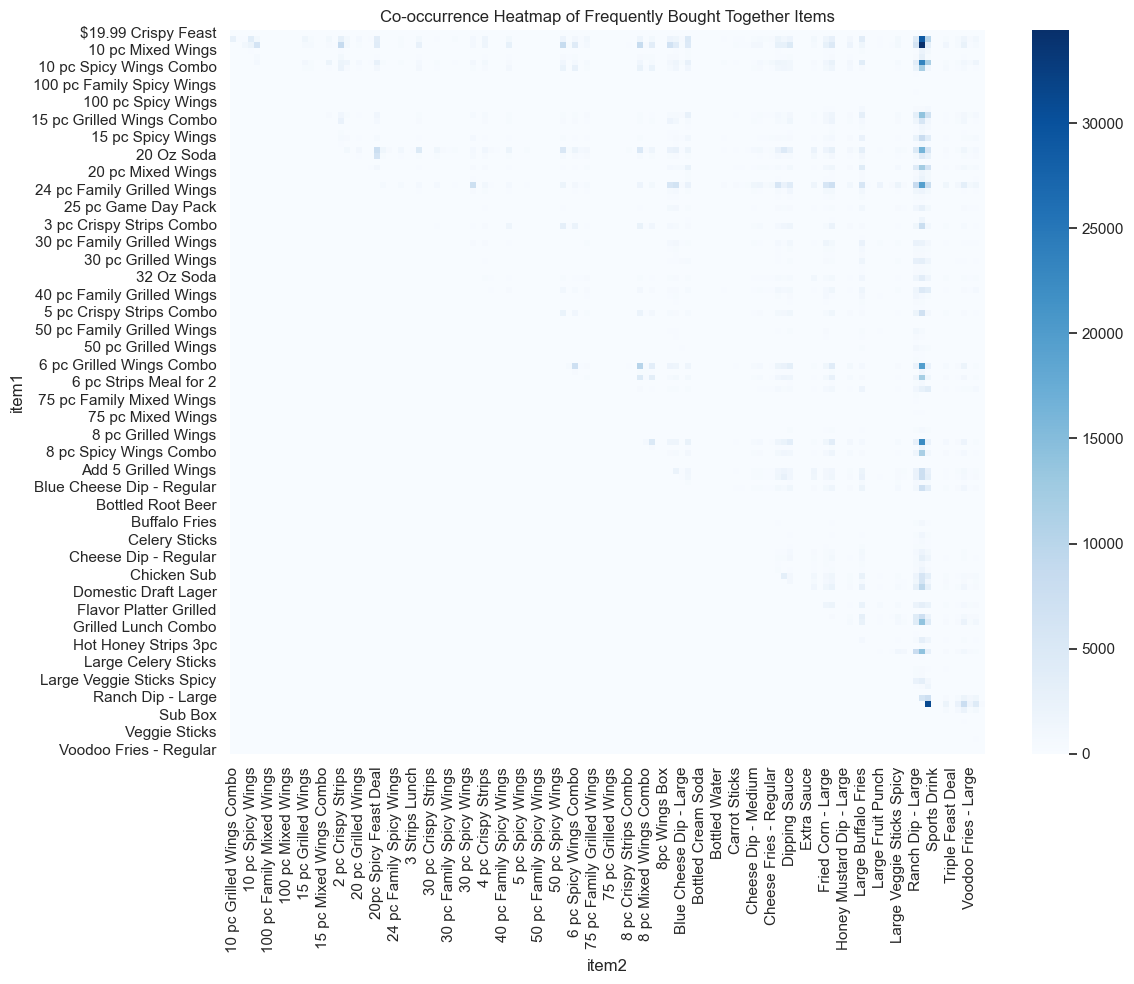

In [37]:
# Co-purchase heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap='Blues')
plt.title("Co-occurrence Heatmap of Frequently Bought Together Items")
plt.tight_layout()
plt.show()

In [38]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 544.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.4 MB 944.1 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 1.8 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.4 MB 2.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 3.0 MB/s eta 0:00:01
   -------------------------------------- - 1.3/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [40]:
multi_item_carts = df[df['item_name'].apply(len) > 1]['item_name'].tolist()

# --- STEP 3: Encode transactions into binary format (0/1 matrix) ---
te = TransactionEncoder()
te_array = te.fit_transform(multi_item_carts)
df_tf = pd.DataFrame(te_array, columns=te.columns_)

In [42]:
# --- STEP 4: Apply FP-Growth algorithm ---
frequent_itemsets = fpgrowth(df_tf, min_support=0.01, use_colnames=True)

In [43]:
print("\nTop Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))


Top Frequent Itemsets:
     support                     itemsets
0   0.371756        (Ranch Dip - Regular)
7   0.155073      (20pc Spicy Feast Deal)
11  0.141556  (10 pc Grilled Wings Combo)
8   0.121668      (Regular Buffalo Fries)
10  0.101203         (2 pc Crispy Strips)
24  0.098572          (Ranch Dip - Large)
12  0.096257   (8 pc Grilled Wings Combo)
5   0.095614   (6 pc Grilled Wings Combo)
13  0.074566        (10 pc Grilled Wings)
30  0.071792        (Large Buffalo Fries)


In [44]:
# --- STEP 5: Generate Association Rules ---
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [45]:
# Sort by lift (strongest rules first)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# --- STEP 6: Display Rules ---
print("\nTop 10 Association Rules (Strongest Cart Combos):")
for i, row in top_rules.iterrows():
    print(f"{list(row['antecedents'])} => {list(row['consequents'])} | "
          f"support: {row['support']:.2f}, confidence: {row['confidence']:.2f}, lift: {row['lift']:.2f}")


Top 10 Association Rules (Strongest Cart Combos):
['Ranch Dip - Regular', 'Regular Buffalo Fries'] => ['10 pc Spicy Wings'] | support: 0.01, confidence: 0.22, lift: 3.30
['10 pc Spicy Wings'] => ['Ranch Dip - Regular', 'Regular Buffalo Fries'] | support: 0.01, confidence: 0.17, lift: 3.30
['32 Oz Soda'] => ['20pc Spicy Feast Deal'] | support: 0.01, confidence: 0.45, lift: 2.92
['20pc Spicy Feast Deal'] => ['32 Oz Soda'] | support: 0.01, confidence: 0.08, lift: 2.92
['Ranch Dip - Regular', 'Regular Buffalo Fries'] => ['10 pc Grilled Wings'] | support: 0.01, confidence: 0.19, lift: 2.61
['10 pc Grilled Wings'] => ['Ranch Dip - Regular', 'Regular Buffalo Fries'] | support: 0.01, confidence: 0.13, lift: 2.61
['20 pc Grilled Wings'] => ['Regular Buffalo Fries'] | support: 0.01, confidence: 0.30, lift: 2.51
['Regular Buffalo Fries'] => ['20 pc Grilled Wings'] | support: 0.01, confidence: 0.09, lift: 2.51
['20 Oz Soda'] => ['20pc Spicy Feast Deal'] | support: 0.01, confidence: 0.38, lift: 2.